**NoiseSense – AI-powered Noise Level Prediction (Week 1)**

**PROBLEM STATEMENT:**

“Rapid urbanization, increased traffic, population growth, and industrial activities are causing higher noise levels in cities. NoiseSense uses AI to predict noise levels (Low, Medium, High) based on environmental and urban factors such as traffic density, population, weather, and time of day. This will help city authorities and planners take proactive measures to control noise pollution for healthier cities.”

**Step 1: Import Libraries**

We start by importing the basic Python libraries needed for our project
*   **pandas**: for handling structured data (like CSV files)
*   **numpy**: for numerical operations and calculations
*   **matplotlib**: for basic data visualization
*   **seaborn**: for advanced and attractive data visualization









In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load Dataset**

In this step, we will download the noise pollution dataset directly from Kaggle into Google Colab.

In [6]:
from google.colab import files

# Upload your Kaggle API key (kaggle.json)
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"miza57","key":"21acce132c4de4fb121c3d495ce51443"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!pip install kaggle


In [8]:

!kaggle datasets download -d rohanrao/noise-monitoring-data-in-india


Dataset URL: https://www.kaggle.com/datasets/rohanrao/noise-monitoring-data-in-india
License(s): CC0-1.0
  0% 0.00/21.4k [00:00<?, ?B/s]
100% 21.4k/21.4k [00:00<00:00, 66.5MB/s]


In [9]:
import zipfile


with zipfile.ZipFile("noise-monitoring-data-in-india.zip", "r") as zip_ref:
    zip_ref.extractall("data")


In [10]:
import os
os.listdir("data")


['stations.csv', 'station_month.csv']

**Step 3: Exploratory Data Analysis**

In this step, we will explore the Noise Monitoring Data in India.
EDA helps us understand the dataset, check for missing values, inspect data types, and get a sense of noise levels across cities and time.

In [11]:
import pandas as pd

# Load only the existing files
stations_df = pd.read_csv("data/stations.csv")
station_month_df = pd.read_csv("data/station_month.csv")

# Check first few rows
print("Stations Data:")
display(stations_df.head())

print("Station Monthly Data:")
display(station_month_df.head())


Stations Data:


,Station,Name,City,State,Type
0,DEL01,Dilshad Garden,Delhi,Delhi,Silence
1,DEL02,"CPCB, HQ",Delhi,Delhi,Commercial
2,DEL03,"DCE, Bawana",Delhi,Delhi,Silence
3,DEL04,ITO,Delhi,Delhi,Commercial
4,DEL05,"NSIT, Dwarka",Delhi,Delhi,Silence


Station Monthly Data:


,Station,Year,Month,Day,Night,DayLimit,NightLimit
0,BEN01,2011,2,66.0,56.0,55,45
1,BEN01,2011,3,66.0,58.0,55,45
2,BEN01,2011,4,66.0,57.0,55,45
3,BEN01,2011,5,66.0,56.0,55,45
4,BEN01,2011,6,67.0,57.0,55,45


In [12]:
print("Missing values in stations dataset:\n", stations_df.isnull().sum())
print("\nMissing values in station_month dataset:\n", station_month_df.isnull().sum())


Missing values in stations dataset:
 Station    0
Name       0
City       0
State      0
Type       0
dtype: int64

Missing values in station_month dataset:
 Station        0
Year           0
Month          0
Day            3
Night         10
DayLimit       0
NightLimit     0
dtype: int64


In [13]:
print("Stations Info:")
stations_df.info()

print("\nStation Monthly Info:")
station_month_df.info()


Stations Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Station  70 non-null     object
 1   Name     70 non-null     object
 2   City     70 non-null     object
 3   State    70 non-null     object
 4   Type     70 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB

Station Monthly Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Station     5005 non-null   object 
 1   Year        5005 non-null   int64  
 2   Month       5005 non-null   int64  
 3   Day         5002 non-null   float64
 4   Night       4995 non-null   float64
 5   DayLimit    5005 non-null   int64  
 6   NightLimit  5005 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 273.8+ KB


In [14]:

station_month_df['Day'] = station_month_df['Day'].fillna(station_month_df['Day'].mean())
station_month_df['Night'] = station_month_df['Night'].fillna(station_month_df['Night'].mean())

merged_df = pd.merge(station_month_df, stations_df, on="Station", how="left")

print(merged_df.isnull().sum())


Station       0
Year          0
Month         0
Day           0
Night         0
DayLimit      0
NightLimit    0
Name          0
City          0
State         0
Type          0
dtype: int64


In [15]:
print("Stations Dataset Description:")
display(stations_df.describe())

print("Station Month Dataset Description:")
display(station_month_df.describe())


Stations Dataset Description:


,Station,Name,City,State,Type
count,70,70,70,70,70
unique,70,70,8,7,4
top,DEL01,Dilshad Garden,Delhi,Delhi,Commercial
freq,1,1,10,10,26


Station Month Dataset Description:


,Year,Month,Day,Night,DayLimit,NightLimit
count,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000
mean,2015.195804,6.538462,65.817073,60.430831,60.716284,51.526474
std,2.172061,3.433561,7.411368,8.164560,8.769259,10.170781
min,2011.000000,1.000000,31.000000,25.000000,50.000000,40.000000
25%,2014.000000,4.000000,61.000000,55.000000,50.000000,40.000000
50%,2016.000000,7.000000,66.000000,59.000000,65.000000,55.000000
75%,2017.000000,10.000000,71.000000,66.000000,65.000000,55.000000
max,2018.000000,12.000000,100.000000,103.000000,75.000000,70.000000


In [16]:

merged_df = pd.merge(station_month_df, stations_df, on="Station", how="left")
print("Merged Dataset Shape:", merged_df.shape)
merged_df.head()


Merged Dataset Shape: (5005, 11)


,Station,Year,Month,Day,Night,DayLimit,NightLimit,Name,City,State,Type
0,BEN01,2011,2,66.0,56.0,55,45,BTM,Bengaluru,Karnataka,Residential
1,BEN01,2011,3,66.0,58.0,55,45,BTM,Bengaluru,Karnataka,Residential
2,BEN01,2011,4,66.0,57.0,55,45,BTM,Bengaluru,Karnataka,Residential
3,BEN01,2011,5,66.0,56.0,55,45,BTM,Bengaluru,Karnataka,Residential
4,BEN01,2011,6,67.0,57.0,55,45,BTM,Bengaluru,Karnataka,Residential


In [17]:

city_counts = merged_df['City'].value_counts()

for city, count in city_counts.items():
    print(city, ":", count, "records")


Bengaluru : 715 records
Chennai : 715 records
Delhi : 715 records
Hyderabad : 715 records
Kolkata : 715 records
Lucknow : 715 records
Mumbai : 620 records
Navi Mumbai : 95 records


In [18]:

def noise_category(db):
    if db < 55:
        return 'Low'
    elif db < 70:
        return 'Medium'
    else:
        return 'High'

merged_df['Day_Category'] = merged_df['Day'].apply(noise_category)


category_counts = merged_df['Day_Category'].value_counts()
for cat, count in category_counts.items():
    print(cat, ":", count, "records")


Medium : 3194 records
High : 1510 records
Low : 301 records


**Step 4: Data Visualization**

In this step, we visualize noise trends in India.
Visualization helps us understand which cities are noisier, how noise varies between day and night, and the distribution of noise levels.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")


/tmp/ipython-input-331165125.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")


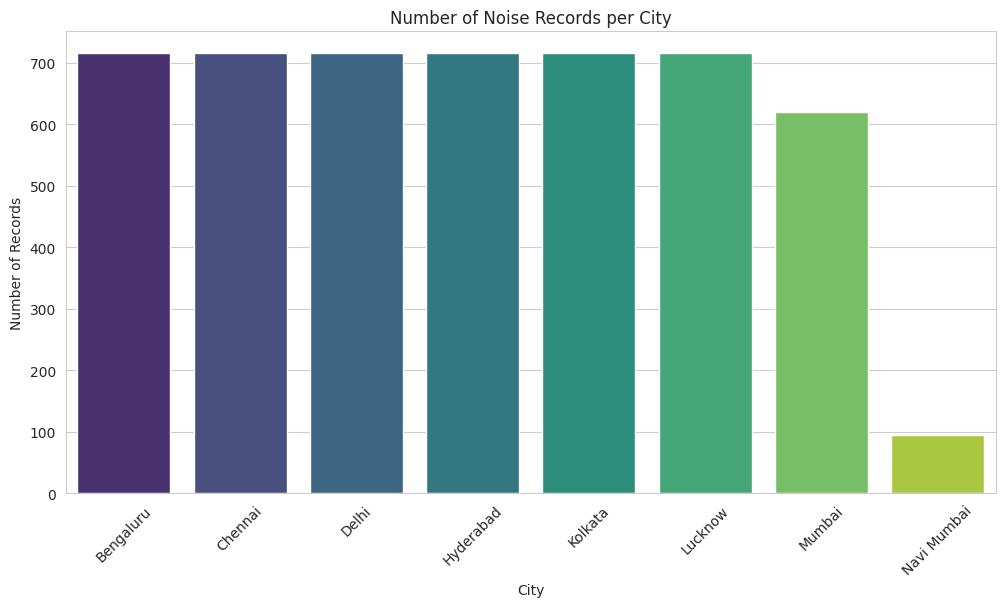

In [20]:

city_counts = merged_df['City'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=city_counts.index, y=city_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Noise Records per City")
plt.xlabel("City")
plt.ylabel("Number of Records")
plt.show()


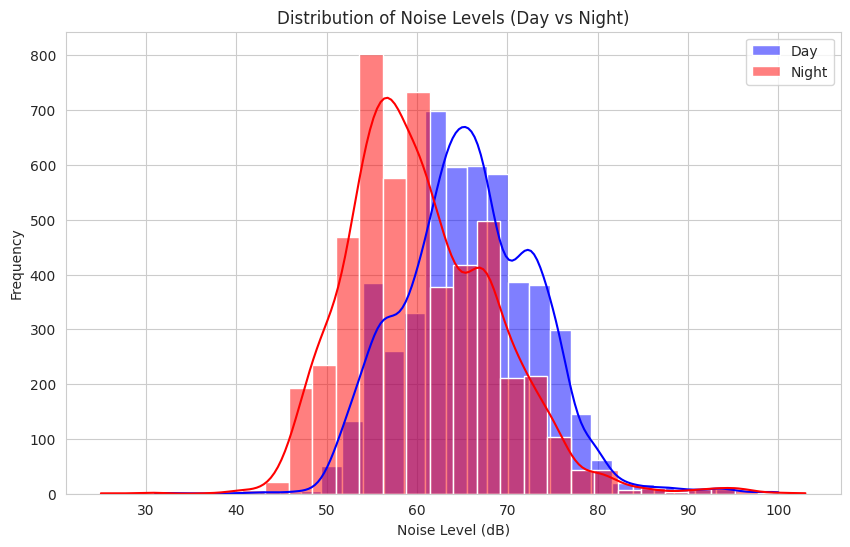

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df['Day'], color='blue', label='Day', kde=True, bins=30)
sns.histplot(merged_df['Night'], color='red', label='Night', kde=True, bins=30)
plt.title("Distribution of Noise Levels (Day vs Night)")
plt.xlabel("Noise Level (dB)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


/tmp/ipython-input-1327698321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_Category', data=merged_df, palette='coolwarm')


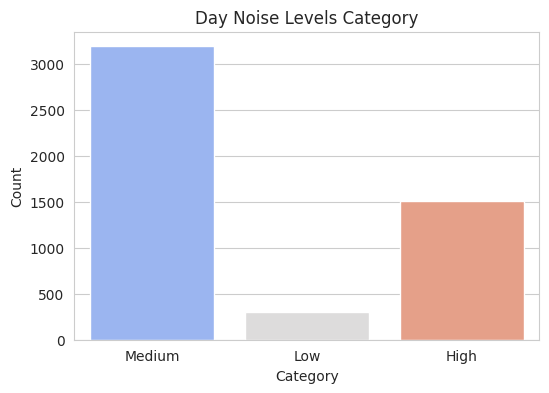

In [22]:
# Plot Day Categories
plt.figure(figsize=(6,4))
sns.countplot(x='Day_Category', data=merged_df, palette='coolwarm')
plt.title("Day Noise Levels Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


**Step 5 : Training the model using Logistic Regression**


In [24]:
from sklearn.preprocessing import LabelEncoder
df = merged_df.copy()

label_enc = LabelEncoder()
df['City'] = label_enc.fit_transform(df['City'])
df['State'] = label_enc.fit_transform(df['State'])
df['Type'] = label_enc.fit_transform(df['Type'])


In [26]:
import numpy as np

def categorize_noise(value):
    if value < 55:
        return "Low"
    elif value < 70:
        return "Medium"
    else:
        return "High"

df["AvgNoise"] = df[["Day", "Night"]].mean(axis=1)

df["Noise_Category"] = df["AvgNoise"].apply(categorize_noise)

print(df["Noise_Category"].value_counts())


Noise_Category
Medium    3343
High       998
Low        664
Name: count, dtype: int64


In [27]:
X = df[['Year', 'Month', 'Day', 'Night', 'City', 'State', 'Type']]
y = df['Noise_Category']


**Step 5 : Training  Model Using Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

**Step 5.1 : Testing the model**

Logistic Regression Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       186
         Low       1.00      1.00      1.00       155
      Medium       1.00      1.00      1.00       660

    accuracy                           1.00      1001
   macro avg       1.00      1.00      1.00      1001
weighted avg       1.00      1.00      1.00      1001



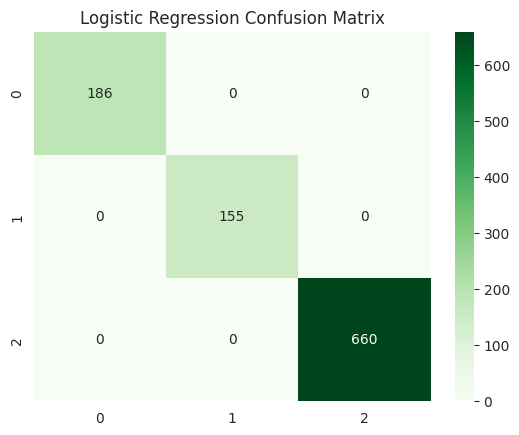

In [31]:
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


**Step 6 : Training the model using DecisionTreeClassifier**

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**Step 6.1:Testing the model**

Decision Tree Accuracy: 0.995004995004995

Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99       186
         Low       0.99      0.99      0.99       155
      Medium       1.00      1.00      1.00       660

    accuracy                           1.00      1001
   macro avg       0.99      0.99      0.99      1001
weighted avg       1.00      1.00      1.00      1001



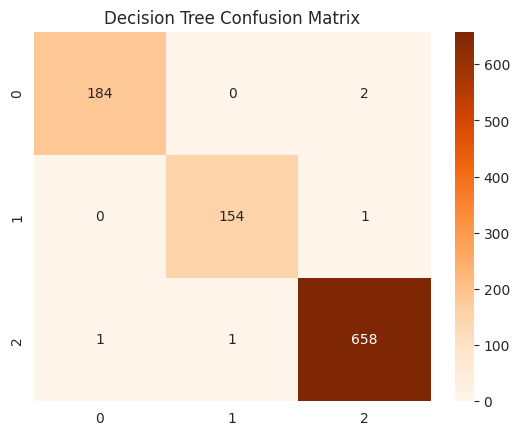

In [33]:
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree Confusion Matrix')
plt.show()


**Step 7 : Training the model using KNN**

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

**Step 7.1 :Testing the model**

KNN Accuracy: 0.9500499500499501

Classification Report:
               precision    recall  f1-score   support

        High       0.93      0.96      0.94       186
         Low       0.92      0.89      0.90       155
      Medium       0.96      0.96      0.96       660

    accuracy                           0.95      1001
   macro avg       0.94      0.94      0.94      1001
weighted avg       0.95      0.95      0.95      1001



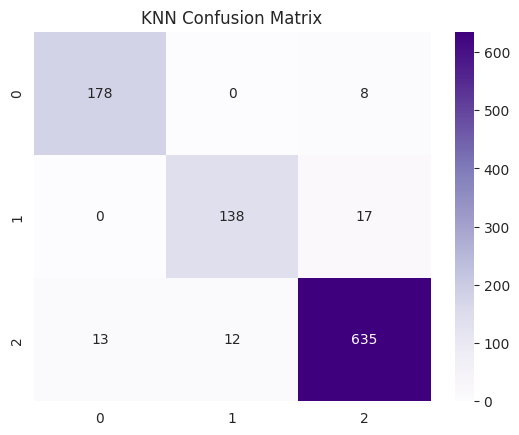

In [35]:
y_pred_knn = knn_model.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Purples')
plt.title('KNN Confusion Matrix')
plt.show()


**Step 8 : Traing the model using SVM**

In [36]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)


SVC()

**Step 8.1 : Testing the model**

SVM Accuracy: 0.986013986013986

Classification Report:
               precision    recall  f1-score   support

        High       0.97      0.99      0.98       186
         Low       0.98      0.98      0.98       155
      Medium       0.99      0.99      0.99       660

    accuracy                           0.99      1001
   macro avg       0.98      0.99      0.98      1001
weighted avg       0.99      0.99      0.99      1001



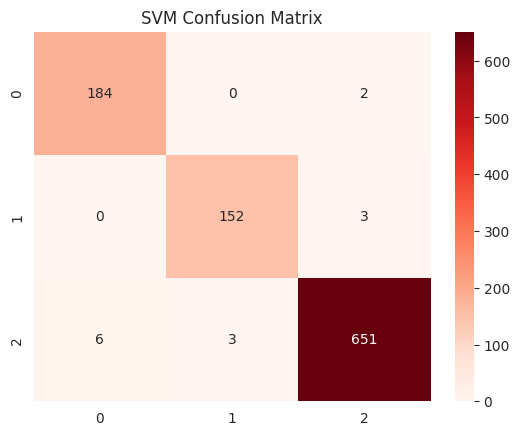

In [37]:
y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds')
plt.title('SVM Confusion Matrix')
plt.show()



**Step 9 : Compare the models**

In [40]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)


In [42]:
models = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'KNN', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm)
]

performance_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
performance_df.sort_values(by='Accuracy', ascending=False, inplace=True)
print(performance_df)


                 Model  Accuracy
1  Logistic Regression  1.000000
2        Decision Tree  0.995005
0        Random Forest  0.993007
4                  SVM  0.986014
3                  KNN  0.950050


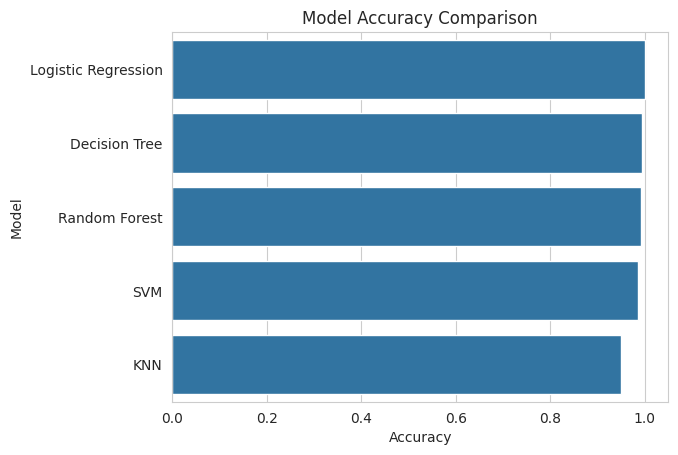

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Accuracy', y='Model', data=performance_df)
plt.title('Model Accuracy Comparison')
plt.show()


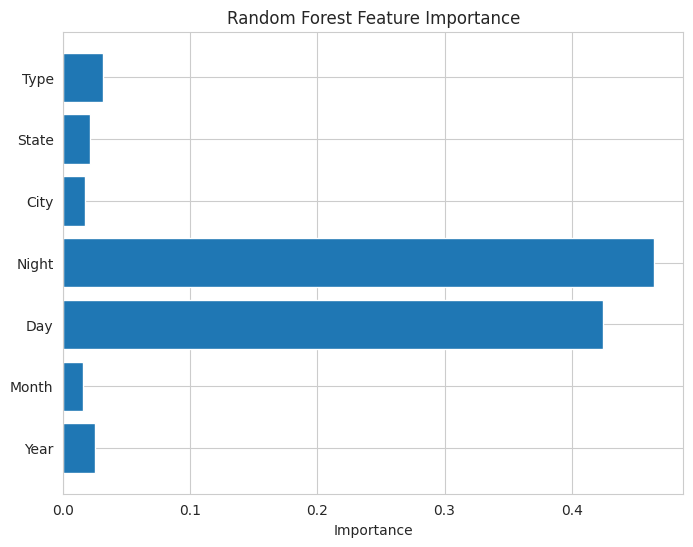

In [44]:
feature_importances = rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(8,6))
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()
